In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
df=pd.read_csv("C:/Users/TIRUPATHI/Downloads/customer churn/data.csv/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.size

147903

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


STEP-3:DATA CLEANING

In [11]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') #coerce is used when conversion to number fails it replaces it with nan.

In [14]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [17]:
df['TotalCharges'].dtype

dtype('float64')

In [18]:
#drop customerID
df.drop('customerID',axis=1,inplace=True) #1,horizontal(columns),0,vertical(rows)

In [19]:
#target variable(count)
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

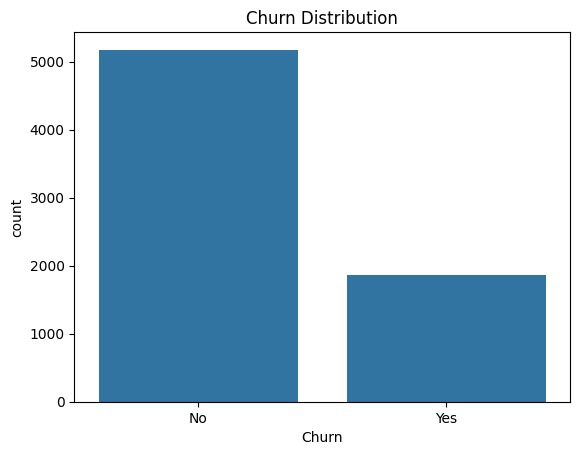

In [20]:
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

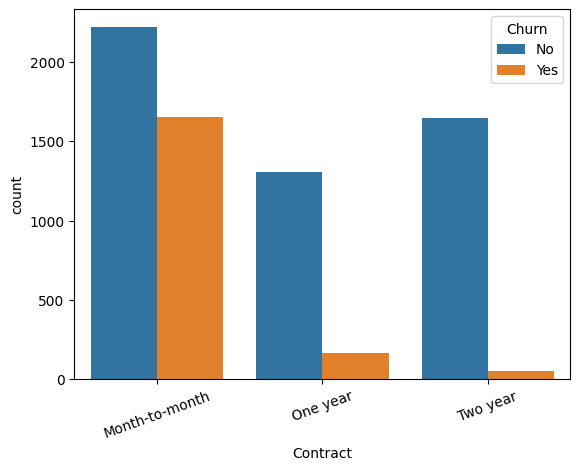

In [21]:
#step-5:exploratory data analysis(EDA)
sns.countplot(x='Contract',hue='Churn',data=df)
plt.xticks(rotation=20) #rotate x-axis for better readability
plt.show()

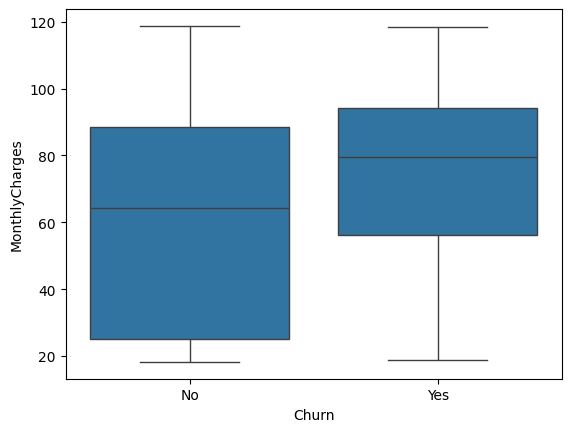

In [22]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)   #boxplot to compare monthly charges for churned an non-churned customers
plt.show() #display the plot

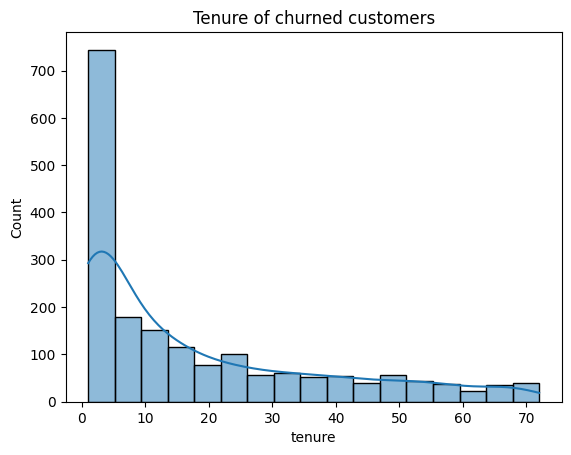

In [23]:
#churn vs tenure
sns.histplot(df[df['Churn']=="Yes"]['tenure'],kde=True)    #plot tenure distribution of customers who churned(kde=kernal distribution line which shows the trend line)
plt.title("Tenure of churned customers")    #tenure=number of months 
plt.show()

In [24]:
#encoding the churn from variables to values(0 or 1)
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
#encode categorical columns
df=pd.get_dummies(df,drop_first=True) #one hot encoding(number of columns increased because categorical variables were expanded into dummy variables)
df.head()                          

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [27]:
#train-test-split
x=df.drop('Churn',axis=1) #seperate independent variables(features)
y=df['Churn'] #target variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
# Split data into training and testing sets
# stratify=y keeps churn ratio same in both sets

In [28]:
#feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
#fit_transform → calculates mean & std on training data and scales it
#transform → scales test data using the same mean & std from training data
x_test=scaler.transform(x_test)

In [29]:
#logistic regression model
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [30]:
#accuracy score
print("logistic regression accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

logistic regression accuracy: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [31]:
#creating a random forest model
rf=RandomForestClassifier(n_estimators=200,
                          random_state=42,
                          class_weight='balanced')
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [32]:
print("random forest accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

random forest accuracy: 0.7885024840312278
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



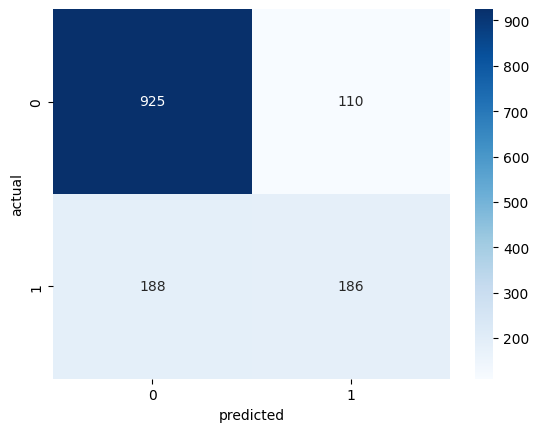

In [33]:
#confusion matrrix
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [34]:
#feature importance
feature_importance=pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance.head(10)

TotalCharges                      0.177273
tenure                            0.164566
MonthlyCharges                    0.151406
Contract_Two year                 0.059623
InternetService_Fiber optic       0.040754
PaymentMethod_Electronic check    0.035761
Contract_One year                 0.029983
OnlineSecurity_Yes                0.028859
gender_Male                       0.025542
PaperlessBilling_Yes              0.023940
dtype: float64

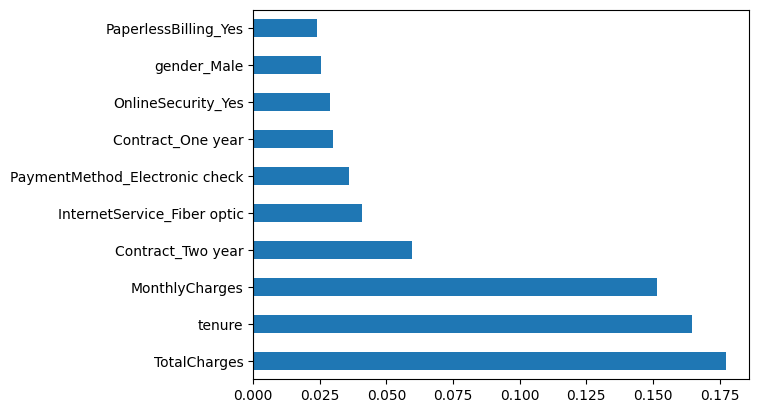

In [35]:
feature_importance.head(10).plot(kind='barh')
plt.show()

In [37]:
import joblib
joblib.dump(rf,"rf_churn_model.pkl")

['rf_churn_model.pkl']

In [38]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [40]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

with open("churn model/model_metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n\n")
    f.write(report)

In [41]:
loaded_model = joblib.load("rf_churn_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [44]:
import joblib
loaded_model = joblib.load("churn model/rf_churn_model.pkl")
loaded_scaler = joblib.load("churn model/scaler.pkl")
print("Model and scaler loaded successfully")

Model and scaler loaded successfully


In [48]:
print(loaded_model.n_features_in_)

30


In [50]:
x= df.drop("Churn", axis=1)

In [51]:
x.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [54]:
import numpy as np
sample_data = np.array([[
    0, 12, 70.5, 845.5,1,1,0,1, 0,  1,  1, 0,  0, 1, 0,1,0, 1, 0, 1, 0,1, 0, 1, 0, 0, 1, 0,  1,  0  
]])

In [65]:
sample_df= x.iloc[[0]]   # one row, correct order
sample_scaled = loaded_scaler.transform(sample_df)
prediction = loaded_model.predict(sample_scaled)
print("Churn Prediction:", prediction[0])

Churn Prediction: 0


In [66]:
print(sample_data.shape)
print(loaded_model.n_features_in_)

(1, 30)
30


In [67]:
sample_df = x.iloc[[0]] 
sample_scaled = loaded_scaler.transform(sample_df)
loaded_model.predict(sample_scaled)

array([0])